## Practice 5: Logistic Regression

**Ojeda Contreras Braulio Melquisedec**

**December 2nd, 2022**

*Requirements:*

Using the breast-cancer.csv dataset do the following:

1. Load the dataset into a pandas dataframe
    - Size column is the feature from the houses
    - Diagnosis column is the value to be predicted
2. Divide the dataset in training set (90%) and test set (10%) ensuring to shuffle them and fixing random_state as zero
3. Using the training set train a logistic regression model
4. Using the generated model classify the test data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Create a data.frame with the file given
df = pd.read_csv('./breast-cancer.csv', sep=',', engine='python')

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
# Indicating tag column name
tag_name = 'diagnosis'

In [5]:
# Corpus without tags
X = df.drop(tag_name, axis = 1).values
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [6]:
# Tags
y = df[tag_name].values
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 0)

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) #la clase predicha

In [9]:
print ('\033[1mReal class\033[0m\n', y_test)

Real class
 ['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B']


In [10]:
print ('\033[1mPredicted class\033[0m\n', y_pred)

Predicted class
 ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B']


In [11]:
print('\033[1mConfusion matrix\033[0m')
print(confusion_matrix(y_test, y_pred))
print('\n\033[1mAccuracy\033[0m')
print('% Correctly predicted instances:', round(accuracy_score(y_test, y_pred) * 100, 2), '%') 
print('# Correctly predicted instances:', accuracy_score(y_test, y_pred, normalize = False), '') 

Confusion matrix
[[35  0]
 [22  0]]

Accuracy
% Correctly predicted instances: 61.4 %
# Correctly predicted instances: 35 


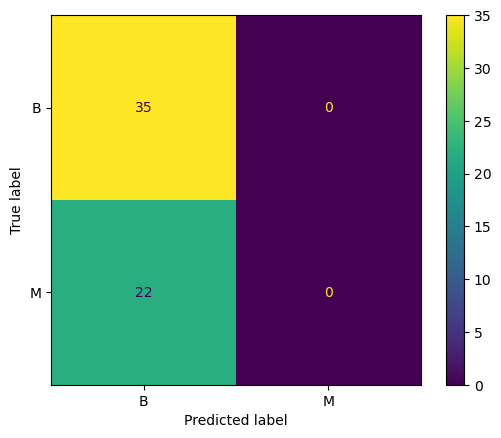

In [12]:
cm = confusion_matrix(y_test, y_pred,labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [13]:
y_pred_proba = clf.predict_proba(X_test) 
print ('\033[1mProbability of belonging to a class\033[0m\n\033[94m', y_pred_proba, '\033[0m')
plt.show()

Probability of belonging to a class
 [[0.50005645 0.49994355]
 [0.50056171 0.49943829]
 [0.50005606 0.49994394]
 [0.500055   0.499945  ]
 [0.5000527  0.4999473 ]
 [0.50005648 0.49994352]
 [0.50000556 0.49999444]
 [0.5000551  0.4999449 ]
 [0.50005678 0.49994322]
 [0.5000554  0.4999446 ]
 [0.50005588 0.49994412]
 [0.50005311 0.49994689]
 [0.50005582 0.49994418]
 [0.50053698 0.49946302]
 [0.50005311 0.49994689]
 [0.50000537 0.49999463]
 [0.50005513 0.49994487]
 [0.50543705 0.49456295]
 [0.50000557 0.49999443]
 [0.50005455 0.49994545]
 [0.50005262 0.49994738]
 [0.50054938 0.49945062]
 [0.50005625 0.49994375]
 [0.5005431  0.4994569 ]
 [0.50055557 0.49944443]
 [0.50005576 0.49994424]
 [0.5000537  0.4999463 ]
 [0.50521894 0.49478106]
 [0.50055546 0.49944454]
 [0.50005533 0.49994467]
 [0.50005385 0.49994615]
 [0.50005194 0.49994806]
 [0.50056178 0.49943822]
 [0.5053461  0.4946539 ]
 [0.50005357 0.49994643]
 [0.50529629 0.49470371]
 [0.50054327 0.49945673]
 [0.5000534  0.4999466 ]
 [0.500056   